In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pgg = {
    'path': './',
    'name': 'public_goods_game',
    'trial_id': 'schelling',
    'n': 7,
    'ylim': 100,
    'ylim_r': 600,
}
crd = {
    'path': '../results.csv',
    'name': 'collective_risk_dilemma',
    'y_min': 0,
    'y_max': 3,
}
cpr = {
    'path': './',
    'name': 'clean_up',
    'trial_id': 'schelling',
    'n': 7,
    'ylim': 0,
    'ylim_r': 5000,
}

# FIGSIZE=(3.2, 0.9), SIZE=8  # for paper
# FIGSIZE=(5, 1.2)  # for LNCS paper
FIGSIZE, SIZE =(10, 4), 12  # for viewing
plt.rcParams.update({
   'font.size': SIZE,
   'axes.titlesize': 'medium',
   'axes.labelsize': 'medium',
   'xtick.labelsize': 'small',
   'ytick.labelsize': 'small',
   'legend.fontsize': 'medium',
   'axes.linewidth': 0.1
})

In [36]:
env = crd

df = pd.read_csv(env['path'])
n = df.shape[0] - 1
df['mean_welfare'] = df.index * df['avg_cooperative_score'].fillna(0) + (n-df.index) * df['avg_aggressive_score'].fillna(0)

# shift rewards so Schelling
df['avg_cooperative_score'] = np.roll(df['avg_cooperative_score'], -1)

df['mean_welfare'] = df['mean_welfare'] / (n * df['matches_played'])
df['avg_cooperative_score'] = df['avg_cooperative_score'] / df['matches_played']
df['avg_aggressive_score'] = df['avg_aggressive_score'] / df['matches_played']
    
df

,n_cooperative,n_aggressive,avg_cooperative_score,avg_aggressive_score,matches_played,mean_welfare
0,0,6,0.8075,0.994167,20,0.994167
1,1,5,1.2100,1.005500,20,0.972500
2,2,4,2.0000,1.501250,20,1.404167
3,3,3,2.0000,2.958333,20,2.479167
4,4,2,2.0000,2.992500,20,2.330833
5,5,1,2.0000,2.990000,20,2.165000
6,6,0,0.0000,0.000000,20,2.000000


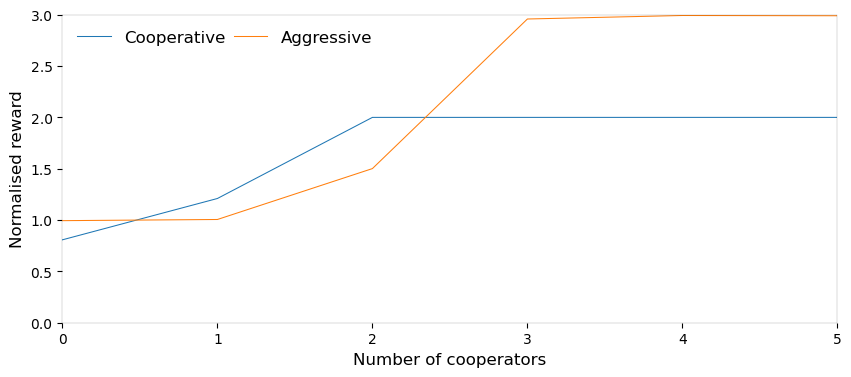

In [37]:
# plot SW on RHS
fig, ax = plt.subplots(figsize=FIGSIZE, facecolor='white')
df.plot(y='avg_cooperative_score', x='n_cooperative', ax=ax, label= 'rewards_c', lw=0.75)
df.plot(y='avg_aggressive_score', x='n_cooperative', ax=ax, label= 'rewards_d', lw=0.75)

y_min = env['y_min']
y_max = env['y_max']
ax.set_xlabel('Number of cooperators')
ax.set_ylabel('Normalised reward')
ax.set_ylim(y_min, y_max)
ax.set_xlim(0, n - 1)
# ax.set_yticks(np.arange(0, ylim + 1, ylim / 4))

# ax2 = ax.twinx()
# df.plot(y='mean_welfare', ax=ax2, label= 'Total reward', lw=0.75, linestyle='--', color='green')

# ax2.set_ylim(0, ylim_r)
# ax2.set_yticks(np.arange(0, ylim_r + 1, ylim_r / 4))
ax2.set_ylabel('Average welfare')

lines1, labels1 = ax.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1, ['Cooperative', 'Aggressive'], bbox_to_anchor=(0, 1), loc='upper left', ncol=3, frameon=False, columnspacing=0.5)
# ax.legend(lines1 + lines2, ['Cooperate', 'Defect'] + ['Total reward'], bbox_to_anchor=(-0.1, 1.35), loc='upper left', ncol=3, frameon=False, columnspacing=0.5)
# ax2.get_legend().remove()

name = f'schelling_{env["name"]}'
fig.savefig(f'{name}.svg', format='svg', bbox_inches='tight')
fig.savefig(f'{name}.png', format='png', bbox_inches='tight')